<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [13]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [14]:
!ls

data
data.tar.gz
LS_DS_412_Vector_Representations_Assignment.ipynb
LS_DS_412_Vector_Representations_Lecture.ipynb
previous_lectures
Untitled.ipynb


In [15]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv("https://github.com/ekoly/DS-Unit-4-Sprint-1-NLP/raw/master/module2-vector-representations/data/job_listings.csv")
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [16]:
df["description"] = df["description"].apply(lambda s: " ".join(BeautifulSoup(s, "html.parser").stripped_strings).replace("\\n", " "))
df.head()

,Unnamed: 0,description,title
0,0,"b"" Job Requirements: Conceptual understanding...",Data scientist
1,1,"b' Job Description As a Data Scientist 1, ...",Data Scientist I
2,2,b' As a Data Scientist you will be working on ...,Data Scientist - Entry Level
3,3,"b' $4,969 - $6,756 a month Contract Under the ...",Data Scientist
4,4,b' Location: USA \xe2\x80\x93 multiple locatio...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [17]:
try:
    nlp = spacy.load("en_core_web_lg")
except:
    !python -m spacy download en_core_web_lg
    nlp = spacy.load("en_core_web_lg")

In [18]:
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(df["description"], batch_size=500):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", "", t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(" ".join(doc_tokens))

df["tokens"] = tokens

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
counts = cv.fit_transform(df["tokens"])

In [8]:
!pip install -i https://test.pypi.org/simple/ five-one-one

Looking in indexes: https://test.pypi.org/simple/


In [9]:
from FiveOneOne import nlp_utils

## 4) Visualize the most common word counts

In [10]:
from collections import Counter

counts = Counter()
for row in df["tokens"]:
    counts.update(row.split(" "))

print(counts.most_common(20))

[('data', 4278), ('experience', 1874), ('business', 1185), ('work', 1144), ('team', 963), ('science', 934), ('learning', 900), ('analytics', 719), ('skills', 686), ('machine', 683), ('analysis', 677), ('models', 614), ('product', 569), ('statistical', 562), ('solutions', 528), ('new', 527), ('ability', 520), ('scientist', 495), ('insights', 462), ('help', 456)]


In [11]:
!pip install squarify

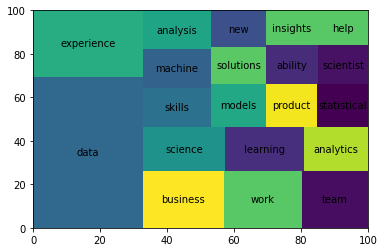

In [12]:
import squarify

mc = counts.most_common(20)
squarify.plot(sizes=[c for w, c in mc], label=[w for w, c in mc])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [29]:
X = vectorizer.fit_transform(df["tokens"])
X

<426x9026 sparse matrix of type '<class 'numpy.float64'>'
	with 91609 stored elements in Compressed Sparse Row format>

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [35]:
my_desc = "Looking for a data engineer to help us build terminator robots for world domination"

# TODO make function
tokens = []
for doc in tokenizer.pipe([my_desc], batch_size=500):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", "", t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(" ".join(doc_tokens))

X_test = tokens
X_test = vectorizer.transform(X_test)
X_test

<1x9026 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [47]:
_, indices = nn.kneighbors(X_test)
indices

array([[261, 139]])

In [50]:
df.iloc[139]["description"]

"b' Looking to make a big impact and revolutionize the next frontier of programmatic buying ? LiveReach Media plans to disrupt the Digital Out-of-Home market by producing a world class industry leading programmatic platform and bring the online media buying experience to the Digital-Out-of-Home market. As a data scientist, you will work with large complex data sets to drive product improvement, implement dashboards and data visualizations for an industry leading platform, and mine massive sets of unique user data collected through LRM\\xe2\\x80\\x99s proprietary methodology.  Location: Sunnyvale, California  Education & Experience: 3+ years of work experience, Bachelors Degree or higher in Statistics/Economics/Quantitative Academic  Field Preferred  Functions: Data Science, Engineering  Requirements  Experience with pattern recognition, natural language processing, and mining of structured, semi-structured, and unstructured data  Experience with large log data processing and analysis t

In [51]:
df.iloc[261]["description"]

"b' The Data Science Engineer, Mintel Futures is a core part of Mintel\\xe2\\x80\\x99s data science team that will have the opportunity to work on a wide array of initiatives across varying aspects of Mintel\\xe2\\x80\\x99s business and data. This individual will help manage the full analytics lifecycle of advanced projects; help to identify new, impactful ways to apply machine learning to Mintel\\xe2\\x80\\x99s data; work alongside data scientists and business stakeholders to implement solutions that provide valuable insights; and aide in the design and development of a modern data analytics environment.    What You Will Do:     Play an integral role in shaping the underlying technology environment for Mintel\\xe2\\x80\\x99s fast growing team of data scientists and data analysts   Assist in the acquisition and management of a variety of data sources for large-scale analysis   Identify opportunities for predictive modeling or other machine learning techniques and experiment with soluti

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 